In [42]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
base_url = 'http://127.0.0.1:5000'

In [46]:
base_url + '/help'

'http://127.0.0.1:5000/help'

In [49]:
#help
response = requests.get(base_url + '/help')
response = response.json()
response

{'code': 200,
 'data': [{'/': 'API base URL'},
  {'/help': 'Print all defined routes and their endpoint docstrings.'},
  {'/severity/dist': 'Base severity distribution.'},
  {'/severity/year': 'Base severity change over time'},
  {'/worst_products_platforms/<string:prod_or_plat>': 'Get top 10 worst products/platforms. Variable prod_or_plat = [product,platform]'},
  {'/top_vul/<int:cvss_ver>/<string:score>': 'Get top 10 vulnerabilities based on the score and cvss version. cvss_ver = [2,3] & score = [impact_score,exploitability_score]'},
  {'/cve_or_prod/<string:cve_or_prod>/<string:id>': 'Possibility to query information about either CSV (https://nvd.nist.gov/vuln/search) or product ID (https://nvd.nist.gov/products/cpe/search)'}]}

In [50]:
#severity distribution

response_cve = requests.get(base_url + '/severity/dist')
response = response_cve.json()
response

{'severity_distribution': [{'CRITICAL': 7216},
  {'LOW': 14657},
  {'HIGH': 65123},
  {'MEDIUM': 93112}]}

In [51]:
#severity change over time
response_cve = requests.get(base_url + '/severity/year')
response = response_cve.json()
response

{'severity_distribution': [{'avg_base_severity': 2.0,
   'n_cve': 2,
   'year': '1988'},
  {'avg_base_severity': 1.67, 'n_cve': 3, 'year': '1989'},
  {'avg_base_severity': 1.64, 'n_cve': 11, 'year': '1990'},
  {'avg_base_severity': 1.73, 'n_cve': 15, 'year': '1991'},
  {'avg_base_severity': 1.85, 'n_cve': 13, 'year': '1992'},
  {'avg_base_severity': 1.46, 'n_cve': 13, 'year': '1993'},
  {'avg_base_severity': 1.52, 'n_cve': 25, 'year': '1994'},
  {'avg_base_severity': 1.68, 'n_cve': 25, 'year': '1995'},
  {'avg_base_severity': 1.47, 'n_cve': 74, 'year': '1996'},
  {'avg_base_severity': 1.49, 'n_cve': 252, 'year': '1997'},
  {'avg_base_severity': 1.46, 'n_cve': 246, 'year': '1998'},
  {'avg_base_severity': 1.34, 'n_cve': 894, 'year': '1999'},
  {'avg_base_severity': 1.35, 'n_cve': 1018, 'year': '2000'},
  {'avg_base_severity': 1.35, 'n_cve': 1673, 'year': '2001'},
  {'avg_base_severity': 1.39, 'n_cve': 2149, 'year': '2002'},
  {'avg_base_severity': 1.38, 'n_cve': 1523, 'year': '2003'},
 

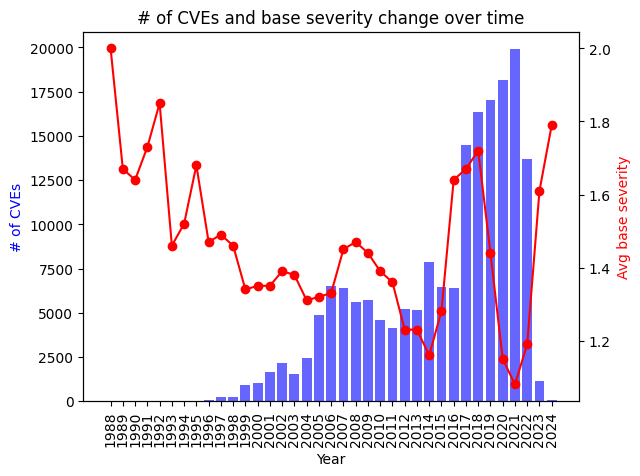

In [52]:
df_raw = response['severity_distribution']
df_raw

#plot
df = pd.DataFrame(df_raw)

fig, ax1 = plt.subplots()

# Plotting the bar plot
ax1.bar(df['year'], df['n_cve'], color='b', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('# of CVEs', color='b')

# Rotating the x-axis labels
plt.xticks(rotation=90)

# Creating the secondary axis for the line plot
ax2 = ax1.twinx()
ax2.plot(df['year'], df['avg_base_severity'], color='r', marker='o')
ax2.set_ylabel('Avg base severity', color='r')

# Showing the plot
plt.title('# of CVEs and base severity change over time')
plt.show()

In [54]:
#Worst Products, Platforms
for i in ['product','platform']:
    response_cve = requests.get(base_url + f'/worst_products_platforms/{i}')
    response = response_cve.json()
    print(f'{i}')
    display(response)
    print('\n')

product


{'result': [{'n_cve': 82674, 'product': 'linux_kernel', 'vendor': 'linux'},
  {'n_cve': 46952, 'product': 'ios', 'vendor': 'cisco'},
  {'n_cve': 30584, 'product': 'junos', 'vendor': 'juniper'},
  {'n_cve': 28142, 'product': 'chrome', 'vendor': 'google'},
  {'n_cve': 21535, 'product': 'firefox', 'vendor': 'mozilla'},
  {'n_cve': 20084, 'product': 'opera_browser', 'vendor': 'opera'},
  {'n_cve': 17418, 'product': 'windows_10', 'vendor': 'microsoft'},
  {'n_cve': 15863, 'product': 'safari', 'vendor': 'apple'},
  {'n_cve': 15659, 'product': 'android', 'vendor': 'google'},
  {'n_cve': 15592, 'product': 'mac_os_x', 'vendor': 'apple'}],
 'type': 'product'}



platform


{'result': [{'n_cve': 96154, 'vendor': 'cisco'},
  {'n_cve': 82912, 'vendor': 'linux'},
  {'n_cve': 70813, 'vendor': 'microsoft'},
  {'n_cve': 69973, 'vendor': 'apple'},
  {'n_cve': 50858, 'vendor': 'ibm'},
  {'n_cve': 46840, 'vendor': 'google'},
  {'n_cve': 40769, 'vendor': 'mozilla'},
  {'n_cve': 39266, 'vendor': 'adobe'},
  {'n_cve': 33151, 'vendor': 'oracle'},
  {'n_cve': 32298, 'vendor': 'juniper'}],
 'type': 'platform'}

In [61]:
# Top 10 vulnerabilities that have the highest impact or highest exploitability scores depending on the CVSS ver (2 or 3)
for i in [2,3]:
    for j in ['impact_score','exploitability_score']:
        response_cve = requests.get(base_url + f'/top_vul/{i}/{j}')
        response = response_cve.json()
        print(f'{i}, {j}')
        display(response)
        print('\n')

2, impact_score


{'cvss_ver': 2,
 'result': [{'avg_score': 6.4,
   'n_cve': 19314,
   'sum_score': 123609.6,
   'vector_string': 'AV:N/AC:L/Au:N/C:P/I:P/A:P'},
  {'avg_score': 10.0,
   'n_cve': 6822,
   'sum_score': 68220.0,
   'vector_string': 'AV:N/AC:L/Au:N/C:C/I:C/A:C'},
  {'avg_score': 6.4,
   'n_cve': 9451,
   'sum_score': 60486.4,
   'vector_string': 'AV:N/AC:M/Au:N/C:P/I:P/A:P'},
  {'avg_score': 10.0,
   'n_cve': 5998,
   'sum_score': 59980.0,
   'vector_string': 'AV:N/AC:M/Au:N/C:C/I:C/A:C'},
  {'avg_score': 10.0,
   'n_cve': 4665,
   'sum_score': 46650.0,
   'vector_string': 'AV:L/AC:L/Au:N/C:C/I:C/A:C'},
  {'avg_score': 2.9,
   'n_cve': 13053,
   'sum_score': 37853.7,
   'vector_string': 'AV:N/AC:M/Au:N/C:N/I:P/A:N'},
  {'avg_score': 6.4,
   'n_cve': 3925,
   'sum_score': 25120.0,
   'vector_string': 'AV:L/AC:L/Au:N/C:P/I:P/A:P'},
  {'avg_score': 2.9,
   'n_cve': 8578,
   'sum_score': 24876.2,
   'vector_string': 'AV:N/AC:L/Au:N/C:P/I:N/A:N'},
  {'avg_score': 6.4,
   'n_cve': 3708,
   'sum_s



2, exploitability_score


{'cvss_ver': 2,
 'result': [{'avg_score': 10.0,
   'n_cve': 19314,
   'sum_score': 193140.0,
   'vector_string': 'AV:N/AC:L/Au:N/C:P/I:P/A:P'},
  {'avg_score': 8.6,
   'n_cve': 13053,
   'sum_score': 112255.79999999999,
   'vector_string': 'AV:N/AC:M/Au:N/C:N/I:P/A:N'},
  {'avg_score': 10.0,
   'n_cve': 8578,
   'sum_score': 85780.0,
   'vector_string': 'AV:N/AC:L/Au:N/C:P/I:N/A:N'},
  {'avg_score': 8.6,
   'n_cve': 9451,
   'sum_score': 81278.59999999999,
   'vector_string': 'AV:N/AC:M/Au:N/C:P/I:P/A:P'},
  {'avg_score': 10.0,
   'n_cve': 7501,
   'sum_score': 75010.0,
   'vector_string': 'AV:N/AC:L/Au:N/C:N/I:N/A:P'},
  {'avg_score': 10.0,
   'n_cve': 6822,
   'sum_score': 68220.0,
   'vector_string': 'AV:N/AC:L/Au:N/C:C/I:C/A:C'},
  {'avg_score': 8.6,
   'n_cve': 5998,
   'sum_score': 51582.799999999996,
   'vector_string': 'AV:N/AC:M/Au:N/C:C/I:C/A:C'},
  {'avg_score': 8.0,
   'n_cve': 3708,
   'sum_score': 29664.0,
   'vector_string': 'AV:N/AC:L/Au:S/C:P/I:P/A:P'},
  {'avg_score':



3, impact_score


{'cvss_ver': 3,
 'result': [{'avg_score': 5.9,
   'n_cve': 6004,
   'sum_score': 35423.6,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H'},
  {'avg_score': 5.9,
   'n_cve': 3392,
   'sum_score': 20012.800000000003,
   'vector_string': 'CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H'},
  {'avg_score': 5.9,
   'n_cve': 3111,
   'sum_score': 18354.9,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H'},
  {'avg_score': 5.9,
   'n_cve': 2263,
   'sum_score': 13351.7,
   'vector_string': 'CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H'},
  {'avg_score': 5.9,
   'n_cve': 1707,
   'sum_score': 10071.300000000001,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H'},
  {'avg_score': 2.7,
   'n_cve': 3667,
   'sum_score': 9900.900000000001,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N'},
  {'avg_score': 3.6,
   'n_cve': 2202,
   'sum_score': 7927.2,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H'},
  {'avg_scor



3, exploitability_score


{'cvss_ver': 3,
 'result': [{'avg_score': 3.9,
   'n_cve': 6004,
   'sum_score': 23415.6,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H'},
  {'avg_score': 2.8,
   'n_cve': 3667,
   'sum_score': 10267.599999999999,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N'},
  {'avg_score': 2.8,
   'n_cve': 3111,
   'sum_score': 8710.8,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H'},
  {'avg_score': 3.9,
   'n_cve': 2202,
   'sum_score': 8587.8,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H'},
  {'avg_score': 3.9,
   'n_cve': 1862,
   'sum_score': 7261.8,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:N/A:N'},
  {'avg_score': 1.8,
   'n_cve': 3392,
   'sum_score': 6105.6,
   'vector_string': 'CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H'},
  {'avg_score': 2.8,
   'n_cve': 1707,
   'sum_score': 4779.599999999999,
   'vector_string': 'CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H'},
  {'avg_score': 2.3,
   'n

In [62]:
response_cve = requests.get(base_url + '/cve_or_prod/cve' + '/CVE-2000-0388')

response_cve.json()

{'result': [{'base_score': 7.5,
   'base_severity': 'HIGH',
   'cve': 'CVE-2000-0388',
   'cvss_ver': 2,
   'exploitability_score': 10.0,
   'id': 7,
   'impact_score': 6.4,
   'last_ingested': '2024-07-21 19:07:24.752358',
   'last_modified': '2008-09-10T19:04:33.930',
   'published': '1990-05-09T04:00:00.000',
   'vector_string_v2': 'AV:N/AC:L/Au:N/C:P/I:P/A:P',
   'vector_string_v3': None,
   'vuln_status': 'ANALYZED'}],
 'type': 'cve'}